# Analyzing Earthquakes 

The National Earthquake Information Center (NEIC) determines the location and size of all significant earthquakes that occur worldwide and disseminates this information immediately to national and international agencies, scientists, critical facilities, and the general public. The NEIC compiles and provides to scientists and to the public an extensive seismic database that  serves as a foundation for scientific research through the operation of modern digital national and global seismograph networks and cooperative international agreements. The NEIC is the national data center and archive for earthquake information.

# This dataset includes a record of the date, time, location, depth, magnitude, and source of every earthquake with a reported magnitude 5.5 or higher since 1965. Lets conduct an EDA on the dataset and try to uncover meaningful and/or interesting insights from the dataset. 

# Calling libraries

In [1]:
#from numpy import *
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in data and looking at the number of rows and columns using shape function

In [41]:
NEIC = pd.read_csv('F:/Week 4/EDA_Bangalore/EDA_Chennai_/HR_comma_sep.csv',sep = ',')
NEIC.shape

(14999, 10)

In [42]:
NEIC.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Lets use the describe() function to get various summary statistics that exclude NaN values

In [3]:
NEIC.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [4]:
NEIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

# There are lot of variables seems carrying lots of missing values. we can remove some of them as they looks like not useful

In [14]:
NEIC = NEIC.drop(['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error','Root Mean Square'],1)

KeyError: "['Depth Error' 'Depth Seismic Stations' 'Magnitude Error'\n 'Magnitude Seismic Stations' 'Azimuthal Gap' 'Horizontal Distance'\n 'Horizontal Error' 'Root Mean Square'] not found in axis"

In [6]:
NEIC.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [6]:
NEIC.kurt()

Latitude                      -0.602892
Longitude                     -1.249877
Depth                         10.456851
Depth Error                   31.038774
Depth Seismic Stations        -0.099778
Magnitude                      4.388922
Magnitude Error               14.114084
Magnitude Seismic Stations    20.717227
Azimuthal Gap                 17.595858
Horizontal Distance           11.818600
Horizontal Error              68.657024
Root Mean Square               5.148365
dtype: float64

# Identifying the unique factors of Earthquakes

In [19]:
#from numpy import *
print(unique(NEIC.Type))
print(NEIC['Magnitude Type'].unique())

['Earthquake' 'Explosion' 'Nuclear Explosion' 'Rock Burst']
['MW' 'ML' 'MH' 'MS' 'MB' 'MWC' 'MD' nan 'MWB' 'MWW' 'MWR']


# Lets identify the minimum, maximum and average of the Magnitude of the earthquake

In [8]:
minimum=NEIC["Magnitude"].min()
maximum=NEIC["Magnitude"].max()
average=NEIC["Magnitude"].mean()

print("Minimum: " ,minimum)
print("Maximum: " ,maximum)
print("Average: " ,average)

Minimum:  5.5
Maximum:  9.1
Average:  5.882530753460003


# finding Highly effected areas , assuming the one with Magnitude >8

In [9]:
highly_effected=NEIC[NEIC["Magnitude"]>=8]
print(highly_effected)

             Date      Time  Latitude  Longitude        Type   Depth  \
11     01/24/1965  00:11:17   -2.6080   125.9520  Earthquake   20.00   
16     02/04/1965  05:01:22   51.2510   178.7150  Earthquake   30.30   
538    10/17/1966  21:42:00  -10.6650   -78.2280  Earthquake   40.00   
911    05/16/1968  00:49:02   40.8600   143.4350  Earthquake   29.90   
1663   07/31/1970  17:08:05   -1.5970   -72.5320  Earthquake  644.80   
1983   07/14/1971  06:11:30   -5.5240   153.8500  Earthquake   40.00   
2008   07/26/1971  01:23:22   -4.8170   153.1720  Earthquake   40.00   
2530   12/02/1972  00:19:52    6.4050   126.6400  Earthquake   60.00   
3770   01/14/1976  16:47:34  -28.4270  -177.6570  Earthquake   33.00   
7415   03/03/1985  22:47:07  -33.1350   -71.8710  Earthquake   33.00   
7699   09/19/1985  13:17:47   18.1900  -102.5330  Earthquake   27.90   
7959   05/07/1986  22:47:11   51.5200  -174.7760  Earthquake   33.00   
9484   05/23/1989  10:54:46  -52.3410   160.5680  Earthquake   1

# Lets find out the number of earthquake and the Intensity

In [17]:
def f(x):
    return Series(dict(Number_of_earthquakes = x['ID'].count(),
                       Intensity = x['Magnitude'].mean()
                       ))
f(NEIC)

Number_of_earthquakes    23412.000000
Intensity                    5.882531
dtype: float64

# Lets find out the number of earthquake and its intensity according to the Type of disaster

In [18]:
Earthquake_by_type = NEIC.groupby('Type').apply(f)
Earthquake_by_type

,Number_of_earthquakes,Intensity
Type,,
Earthquake,23232.0,5.882763
Explosion,4.0,5.850000
Nuclear Explosion,175.0,5.850686
Rock Burst,1.0,6.200000


In [40]:
Earthquake_by_type = NEIC.groupby(['Type','Magnitude Type').mean()
Earthquake_by_type

Latitude   Longitude      Depth  Magnitude
Type              Magnitude Type                                             
Earthquake        MB               1.836174   59.958010  85.360876   5.674541
                  MD              45.023194 -122.511639  21.670000   5.966667
                  MH              37.576500 -121.740900   8.074600   6.540000
                  ML              39.591225 -120.381530  16.472108   5.842462
                  MS               0.398422   36.233651  30.142226   5.994360
                  MW               3.282243   38.656543  77.034037   5.933794
                  MWB              0.108245   35.876112  76.989829   5.907282
                  MWC             -0.871715   33.395216  66.819824   5.858116
                  MWR             -0.263177   -4.895242  22.445385   5.630769
                  MWW              0.565066   40.297076  67.568545   6.008674
Explosion         MB              19.874500  -36.292250   0.000000   5.850000
Nuclear Explosion MB              40.626442   37.504270   0.202454   5.864417
                  ML              37.282278 -116.421958   1.625000   5.664167
Rock Burst        MWC            -47.911000   99.593000   1.000000   6.200000

In [36]:
Earthquake_by_type = NEIC['Magnitude'].groupby(NEIC['Type']).mean()
Earthquake_by_type

Type
Earthquake           5.882763
Explosion            5.850000
Nuclear Explosion    5.850686
Rock Burst           6.200000
Name: Magnitude, dtype: float64

# importing module for handling date object

In [30]:
import datetime as dt

# Check for 'dtype' of Date

In [31]:
NEIC.dtypes

Date                 object
Time                 object
Latitude            float64
Longitude           float64
Type                 object
Depth               float64
Magnitude           float64
Magnitude Type       object
ID                   object
Source               object
Location Source      object
Magnitude Source     object
Status               object
dtype: object

# Transforming Date from miscellaneous objects to datetime class

In [32]:
NEIC['Date'] = pd.to_datetime(NEIC['Date'])

# set Date column as index

In [33]:
NEIC = NEIC.set_index(['Date'])
NEIC.head(2)

,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
Date,,,,,,,,,,,,
1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic


# Populate the number of Earthquakes by Weekday

In [34]:
Earthquake_by_weekday = NEIC.groupby(NEIC.index.weekday).apply(f)
print(len(Earthquake_by_weekday))
Earthquake_by_weekday

7


,Number_of_earthquakes,Intensity
Date,,
0,3349.0,5.896503
1,3244.0,5.874220
2,3431.0,5.888968
3,3306.0,5.875430
4,3362.0,5.874450
5,3433.0,5.881072
6,3287.0,5.886708


# Populate the number of Earthquakes by Week

In [17]:
Earthquake_by_week = NEIC.groupby(NEIC.index.week).apply(f)
print(len(Earthquake_by_week))
Earthquake_by_week

53


,Intensity,Number_of_earthquakes
Date,,
1,5.888302,424.0
2,5.851500,400.0
3,5.880779,475.0
4,5.841667,420.0
5,5.881175,451.0
6,5.898551,414.0
7,5.860333,451.0
8,5.859785,465.0
9,5.913950,438.0


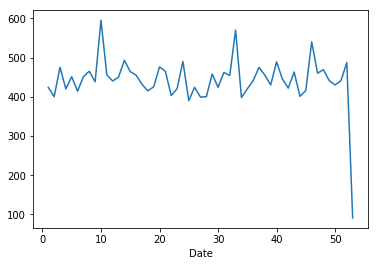

In [18]:
Weekly_dist = Earthquake_by_week['Number_of_earthquakes'].plot(kind = 'line')
Weekly_dist
plt.show()

# Populate the number of Earthquakes by Month

In [19]:
Earthquake_by_month = NEIC.groupby(NEIC.index.month).apply(f)
print(len(Earthquake_by_month))
Earthquake_by_month

12


,Intensity,Number_of_earthquakes
Date,,
1,5.874849,1891.0
2,5.877037,1829.0
3,5.874598,2114.0
4,5.897260,1971.0
5,5.890214,1964.0
6,5.874271,1824.0
7,5.885883,1880.0
8,5.894374,2014.0
9,5.873804,1985.0


# Lets plot a bar graph for the number of earthquakes

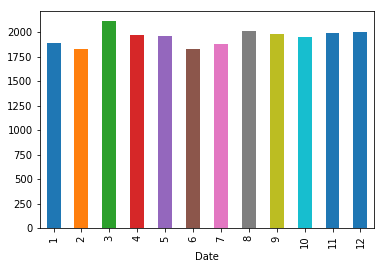

In [20]:
Monthly_dist = Earthquake_by_month['Number_of_earthquakes'].plot(kind = 'bar')

# Populate the number of Earthquakes by Year

In [21]:
Earthquake_by_year = NEIC.groupby(NEIC.index.year).apply(f)
print(len(Earthquake_by_year))
Earthquake_by_year

52


,Intensity,Number_of_earthquakes
Date,,
1965,6.014159,339.0
1966,6.040470,234.0
1967,6.003922,255.0
1968,6.078525,305.0
1969,6.009350,323.0
1970,6.035768,345.0
1971,5.972539,386.0
1972,5.943814,388.0
1973,5.814065,401.0


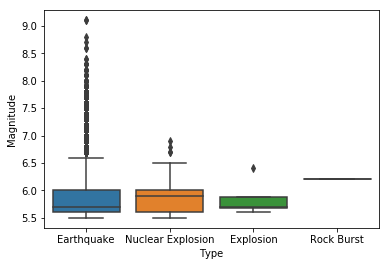

In [22]:
sns.boxplot(x = "Type", y = "Magnitude",data = NEIC)
plt.show()

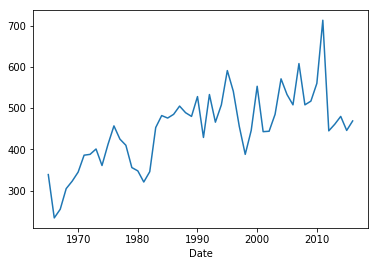

In [23]:
Yearly_dist = Earthquake_by_year['Number_of_earthquakes'].plot(kind = 'line')

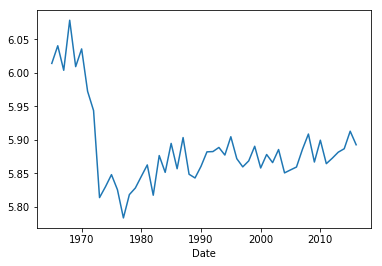

In [24]:
Yearly_dist = Earthquake_by_year['Intensity'].plot(kind = 'line')

# In class lab WAP : Perform EDA on the given data set
    Data Set Name: HR Dataset

HR ANALYTICS DATA DESCRIPTION

Fields in the dataset include:
•	Satisfaction Level
•	Last evaluation
•	Number of projects
•	Average monthly hours
•	Time spent at the company
•	Whether they have had a work accident
•	Whether they have had a promotion in the last 5 years
•	Departments (column sales)
•	Salary
•	Whether the employee has left


Using the dataset, perform an exploratory data analysis (EDA) to identify why are our best and most experienced employees leaving prematurely?. Also, Find the below questions.

1. Find out the number of observations and columns?
2. Check for the missing values?
3. Create a bar chart for finding the department strength?
4. Create a bar chart to find the experience in the company?
5. Create a bar chart to find the average monthly hours spent by employee?
6. Create a histogram for satisfaction level?
7. Create a histogram for number of projects?
8. Create a bar chart for salary-wise attrition(low, medium and high)?
9. How many employees have left the company? 
10. How many employees got promoted in the last 5 years? 
11. How many employees had suffered from work accidents? 
12. How many employees are present in each department? 
13. How many employees are present in different salary ranges(high, low, medium)?
14. How many employees of each salary range are present in different departments? 
15. How many employees got promoted in different departments? 

# Take home assignment***

Based on the previous dataset "HR Analytics", solve the below questions:

1. How much percentage of employees left the company in different departments? 
2. How many employees got promoted in different salary ranges? 
3. How many employees, who got promoted left the company in different salary ranges? 
4. How many employees, who got promoted left the company in different departments? 
5. Average satisfaction level of the company of those who left?
6. Average evaluation points of the company who stayed?
7. Average monthly time spent by employees?
8. Average number of projects that each employee works on?
9. Average monthly hours spent by the employees who “left”?
10. How many employees left after work accident?
11. Which department has the highest satisfaction level?
12. Which department’s employees have the best evaluation?